In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
from IPython.display import display, Latex
import sys

sys.path.append('../function/')
from function import compute_loglikelihood_a1

# 11.1 Simulate data

## 11.1.1

In [12]:
i = np.repeat(np.arange(1,1001),2)
k = np.tile([1,2],1000)
x = np.tile([0,1],1000)
df = pd.DataFrame({'i':i,'k':k,'x':x})
df

,i,k,x
0,1,1,0
1,1,2,1
2,2,1,0
3,2,2,1
4,3,1,0
...,...,...,...
1995,998,2,1
1996,999,1,0
1997,999,2,1
1998,1000,1,0


## 11.1.2

In [13]:
np.random.seed(100)
e = np.random.gumbel(size=2000)
df['e'] = e
df

,i,k,x,e
0,1,1,0,0.243399
1,1,2,1,1.120116
2,2,1,0,0.593217
3,2,2,1,-0.622127
4,3,1,0,5.353825
...,...,...,...,...
1995,998,2,1,-0.002475
1996,999,1,0,2.196352
1997,999,2,1,-1.375727
1998,1000,1,0,0.790071


## 11.1.3

In [14]:
beta = 0.2
latent = df['x']*beta + df['e']
df['latent'] = latent
df

,i,k,x,e,latent
0,1,1,0,0.243399,0.243399
1,1,2,1,1.120116,1.320116
2,2,1,0,0.593217,0.593217
3,2,2,1,-0.622127,-0.422127
4,3,1,0,5.353825,5.353825
...,...,...,...,...,...
1995,998,2,1,-0.002475,0.197525
1996,999,1,0,2.196352,2.196352
1997,999,2,1,-1.375727,-1.175727
1998,1000,1,0,0.790071,0.790071


## 11.1.4

In [15]:
latent_2d = np.reshape(np.array(latent),(-1, 2))
y1 = (latent_2d[:,0]>latent_2d[:,1])*np.ones(1000)
y2 = (latent_2d[:,0]<=latent_2d[:,1])*np.ones(1000)
y = np.reshape(np.dstack((y1,y2)),(-1,))
df['y'] = y
df

,i,k,x,e,latent,y
0,1,1,0,0.243399,0.243399,0.0
1,1,2,1,1.120116,1.320116,1.0
2,2,1,0,0.593217,0.593217,1.0
3,2,2,1,-0.622127,-0.422127,0.0
4,3,1,0,5.353825,5.353825,1.0
...,...,...,...,...,...,...
1995,998,2,1,-0.002475,0.197525,1.0
1996,999,1,0,2.196352,2.196352,1.0
1997,999,2,1,-1.375727,-1.175727,0.0
1998,1000,1,0,0.790071,0.790071,1.0


# 11.2 Estimate the parameter
## 11.2.1

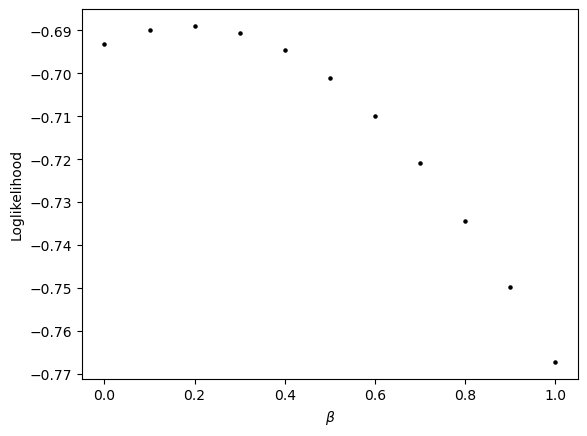

In [16]:
b_seq = np.arange(0,1.1,0.1)
output = np.array([compute_loglikelihood_a1(b=b, df = df) for b in b_seq])
plt.scatter(x = b_seq, y = output, s = 5, c = 'black')
plt.xlabel('$\\beta$')
plt.ylabel('Loglikelihood');

## 11.2.2

In [17]:
likely_verse = lambda b,df: -compute_loglikelihood_a1(b,df)
res = minimize_scalar(likely_verse, args=(df),method='Brent', bracket=(-1.0,1.0))
display(Latex(f'Local Maximize Point: $\\beta$ = {res.x:.3}, Loglikehood = {compute_loglikelihood_a1(res.x,df):.3}'))

<IPython.core.display.Latex object>